In [1]:
from numba import njit
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp # Besserer Integrator
from itertools import product

In [2]:
l = 25
beta0 = 0.5 #days^-1
gamma = 0.1 #days^-1
nu = 0.01 #days^-1
T_range = [40,60] #days
p_base_range = (0.1, 0.3)


p_cap = 1e-3
epsilon = 1e-4
s = 0.3 # seasonal forcing
omega = 2 * np.pi / 360 #days⁻1 




T = 35
p_base = np.linspace(p_base_range[0], p_base_range[1], num=l)

In [3]:
@njit
def P(H):
    return p_base + (1-p_base)/p_cap * epsilon * np.log(1+np.exp(1/epsilon * (p_cap - H)))

@njit
def Gamma(t):
    return 1+ s* np.cos(omega*t)

def odes(t, p, T, p_base):
    S = p[:l]
    I = p[l:2*l]
    H_1 = p[2*l:3*l]
    H = p[3*l:4*l]

    
    R = 1-S-I
    dS = - beta0 * P(H) * Gamma(t) * I * S + nu * R
    dI = beta0 * P(H) * Gamma(t) * I * S - gamma * I
    dH_1 = 2/T * (I - H_1)
    dH = 2/T * (H_1 - H)
    
    return np.concatenate((dS,dI,dH_1, dH))

In [4]:
I0 = 1e-5 * np.ones(l)
S0 = (1-I0)
H_10 = 0 * np.ones(l)
H0 = 0 * np.ones(l)
p0 = np.concatenate((S0, I0, H_10, H0))
print(len(p0))

100


In [5]:
maxdt = 1
sol = solve_ivp(odes, (0,5000), p0, max_step=maxdt, args=(T,p_base))


In [6]:
p = sol.y
t = sol.t
S = p[:l]
I = p[l:2*l]
H_1 = p[2*l:3*l]
H = p[3*l:4*l]

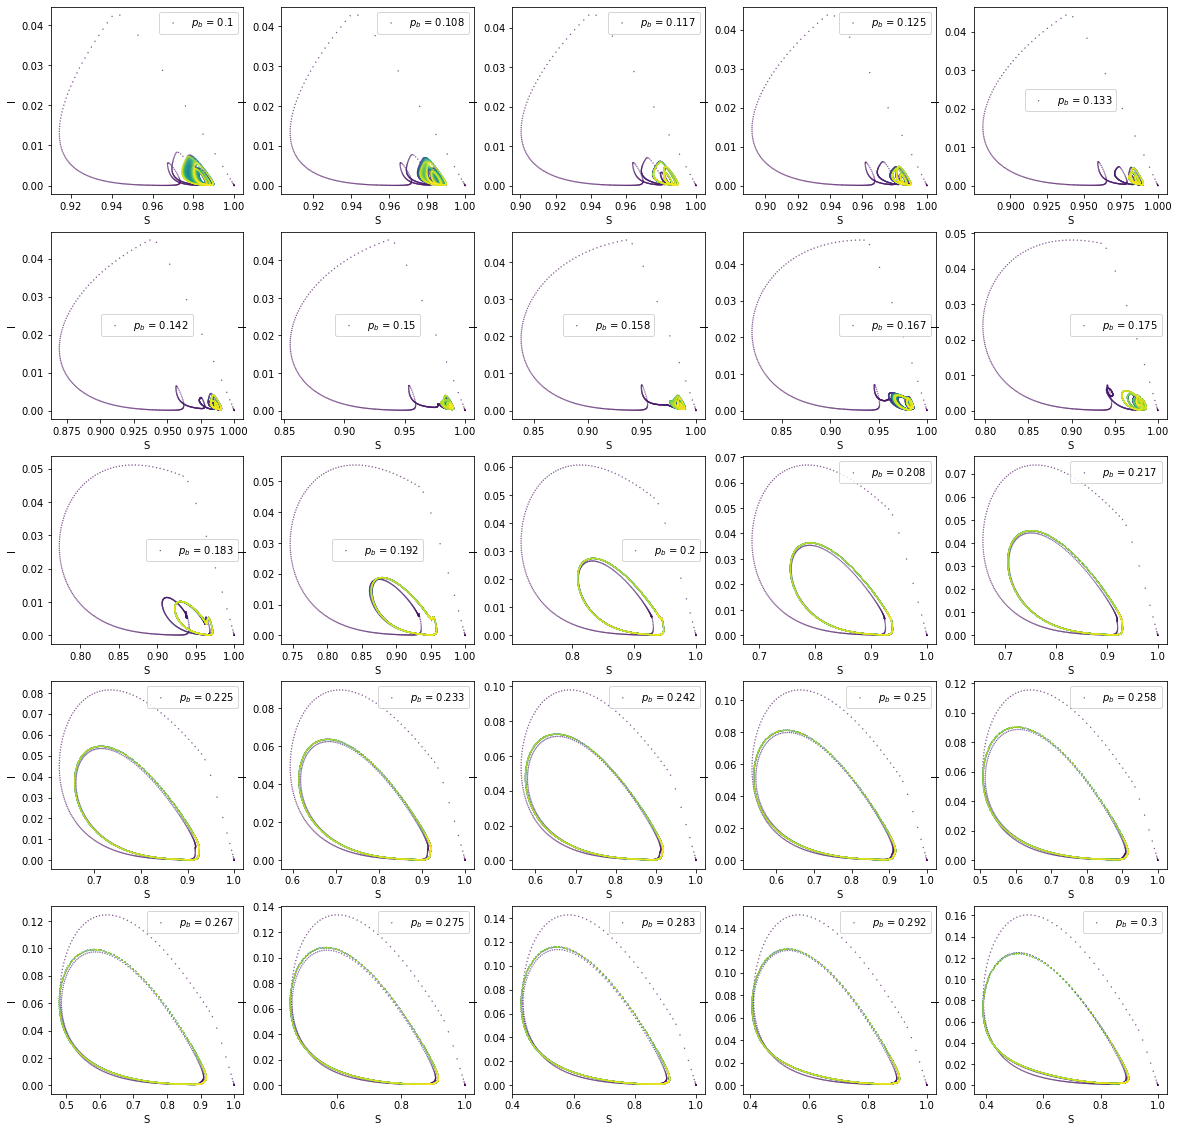

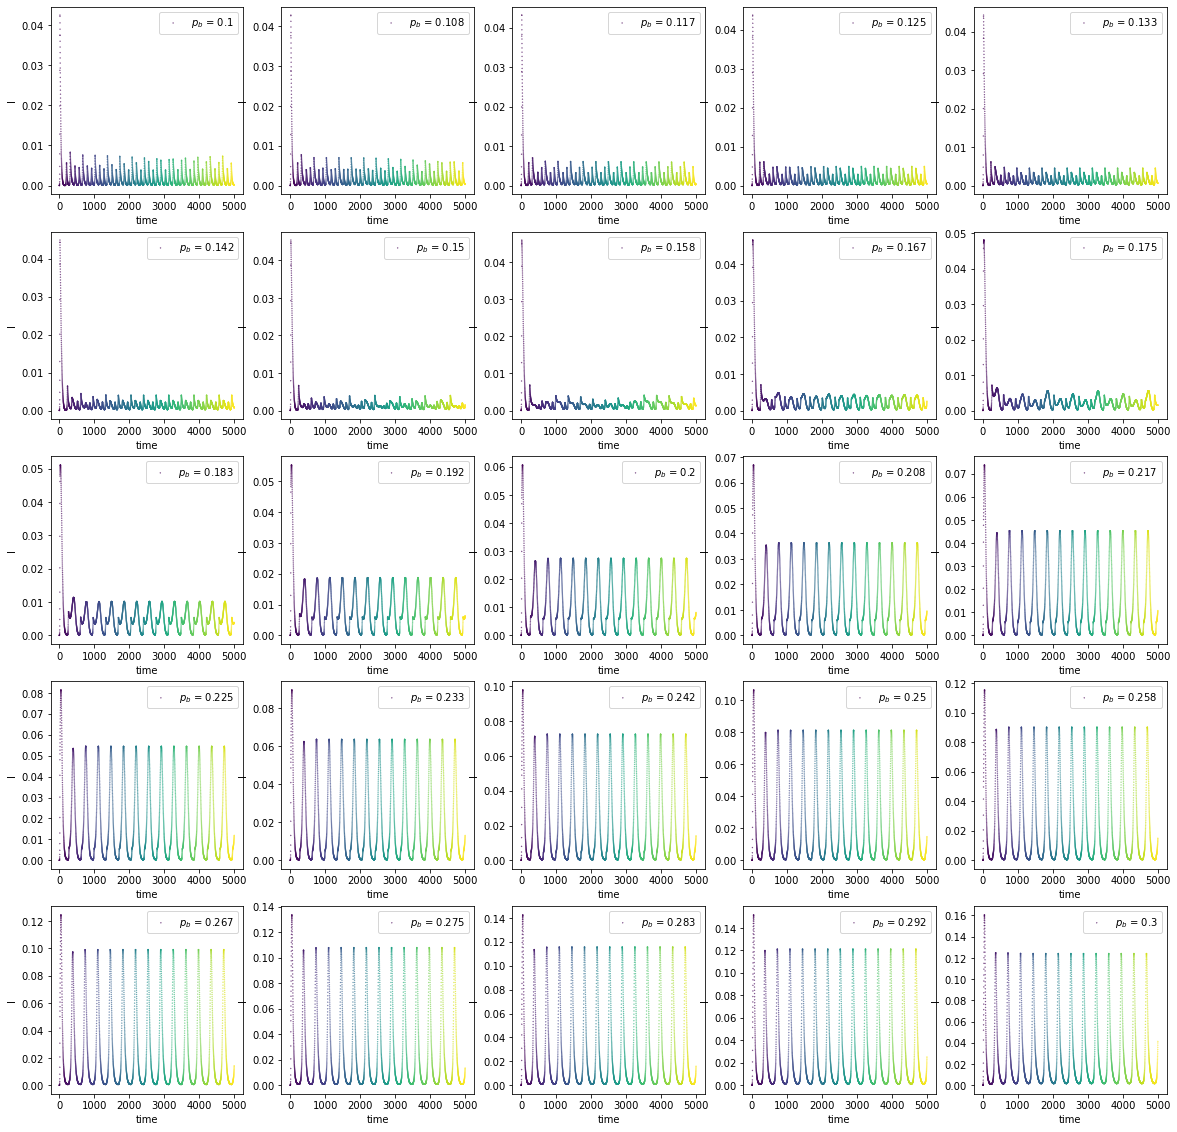

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i in range(l):
    plt.subplot(5, 5, i+1)
    plt.scatter(S[i], I[i], label=f"$p_b$ = {round(p_base[i],3)}", c=t, s=0.1)
    plt.xlabel(r'S')
    plt.ylabel(r'I')
    plt.legend()
plt.show()


plt.figure(figsize=(20, 20))



for i in range(l):
    plt.subplot(5, 5, i+1)
    plt.scatter(t, I[i], label=f"$p_b$ = {round(p_base[i],3)}", c=t, s=0.1)
    plt.xlabel(r'time')
    plt.ylabel(r'I')
    plt.legend()
plt.show()